---
format:
    revealjs:
        logo: "../../images/logo_grey.png"
        theme: [dark, "../../assets/slides.scss"]
        echo: false
        slide-number: true
        chalkboard:
            buttons: false
        controls: true
        preview-links: auto
        controls-back-arrows: visible
        css: course.scss
        footer: "[www.fintechscientist.com](https://www.fintechscientist.com)"

template-partials:
            - title-slide.html

jupyter: python3

width: 1575
height: 1050

title: "🔥 Quer saber como aplicar o Isolation Forest para detecção de fraudes?"
subtitle: "Aprenda a intuição por trás do algoritmo e entenda sua aplicação para detecção de fraudes em cartões"
description: "Aprenda a intuição por trás do algoritmo por meio de uma aplicação para detecção de fraudes em cartões"
author: "Marcus O. Silva"
date: "28/02/2022"

code-block-bg: true
code-block-border-left: "#31BAE9"
highlight-style: ayu-dark

---

##

<img src="logo.png" src="#" height="50%"></img><br>

#### 1. Aprenda a intuição por trás do algoritmo: Isolation Forest

:::: {.columns}

::: {.column width="60%"}
* 🕵️ Anomalias são mais fáceis de isolar do que observações normais
* 🌳 O modelo cria árvores de decisão que dividem os dados aleatoriamente com base nos valores das features
* 🟣 Anomalias requerem menos divisões (ramos da árvore) para serem isoladas (chegar ao nó folha)
* ⚪ Valores normais requerem mais divisões para serem isolados
:::

::: {.column width="40%"}
<img src="isolation_forest.png"></img>
:::

::::

##

<img src="logo.png" src="#" height="50%"></img><br>

#### 1. Aprenda a intuição por trás do algoritmo: Isolation Forest

:::: {.columns}

::: {.column width="60%"}
* ➗ Quanto menor o número de divisões necessárias para isolar um ponto, maior será seu score de anomalia.
* 🤖 No sklearn esse score varia de -1 (anomalia) a 1 (normal).
* ⏸️ É semelhante ao random-forest, mas se trata de um algoritmo não supervisionado
* ⚖️ Aplicado em problemas bem desbalanceados (ex: 0.1% de desbalanceamento)
* ✖️ Ou quando não existem exemplos rotulados (não supervisionado)
:::

::: {.column width="40%"}
<img src="isolation_forest.png"></img>
:::

::::

##

#### 2. Descubra como o isolation forest pode ser aplicado para detectar fraudes em cartões

:::: {.columns}

::: {.column width="50%"}
* <bold> Problema: como identificar transações fraudulentas de cartões de crédito </bold> ?
* ❌ Queremos decidir se uma transação deve ser bloqueada,
* ⚠️ Se deve ser gerado apenas um aviso de suspeita de fraude
* ✅ Ou, se a transação deve ser liberada
* 🌳 Fraudes são difíceis de rotular, pode não haver exemplos de fraudes
* ⚙️ Por isso a importância de um modelo não supervisionado
* 📋 Ao lado a descrição do dataset de exemplo ([link do dataset](https://www.kaggle.com/datasets/marcusos/synthetic-fraud-detection))
:::

::: {.column width="50%" style="font-size: 80%;"}
| Field name                      | Type    |
|---------------------------------|---------|
| transaction_amount              | number  |
| installments                    | integer |
| login_attempts_last_12h         | integer |
| total_of_last_1h_transactions   | number  |
| merchant_id                     | string  |
| time_of_day                     | string  |
| location                        | string  |
::::

::::


## {.smaller}
### 3. Treinando o isolation forest
Agora vamos treinar o isolation forest usando os dados de transações, primeiros vamos importar as libs e carregar o nosso dataset:

In [54]:
#| echo: True
#| output: false
#| classes: my_class1

from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the synthetic credit card transactions dataset
# Dataset link: https://www.kaggle.com/datasets/marcusos/synthetic-fraud-detection
df = pd.read_csv('data/transactions.csv')

# numerical variables
numerical_cols = ['transaction_amount', 'installments', 'login_attempts_last_12h', 'total_of_last_1h_transactions']

# One-hot encode the categorical variables
categorical_cols = ["merchant_id", "location", "time_of_day"]

features = numerical_cols + categorical_cols
df[features].head()

,transaction_amount,installments,login_attempts_last_12h,total_of_last_1h_transactions,merchant_id,location,time_of_day
0,149.905530,1,1,0,B,USA,afternoon
1,562.797829,1,0,2,A,USA,morning
2,86.063994,1,1,1,B,Canada,afternoon
3,571.312878,1,2,0,C,USA,afternoon
4,1146.571706,1,2,2,A,Canada,morning


In [28]:
#| echo: false
#| output: false
print(df[features].head().to_markdown())

|    |   transaction_amount |   installments |   login_attempts_last_12h |   total_of_last_1h_transactions | merchant_id   | location   | time_of_day   |
|---:|---------------------:|---------------:|--------------------------:|--------------------------------:|:--------------|:-----------|:--------------|
|  0 |              149.906 |              1 |                         1 |                               0 | B             | USA        | afternoon     |
|  1 |              562.798 |              1 |                         0 |                               2 | A             | USA        | morning       |
|  2 |               86.064 |              1 |                         1 |                               1 | B             | Canada     | afternoon     |
|  3 |              571.313 |              1 |                         2 |                               0 | C             | USA        | afternoon     |
|  4 |             1146.57  |              1 |                         2 |  


::: {style="font-size: 90%;"}


|    |   transaction_amount |   installments |   login_attempts_last_12h |   total_of_last_1h_transactions | merchant_id   | location   | time_of_day   |
|---:|---------------------:|---------------:|--------------------------:|--------------------------------:|:--------------|:-----------|:--------------|
|  0 |              149.906 |              1 |                         1 |                               0 | B             | USA        | afternoon     |
|  1 |              562.798 |              1 |                         0 |                               2 | A             | USA        | morning       |
|  2 |               86.064 |              1 |                         1 |                               1 | B             | Canada     | afternoon     |
|  3 |              571.313 |              1 |                         2 |                               0 | C             | USA        | afternoon     |
|  4 |             1146.57  |              1 |                         2 |                               2 | A             | Canada     | morning       |
:::

##  {.smaller}
### 3. Treinando o isolation forest
Agora vamos pre-processar o dataset (tratando as categóricas) e por fim fitar o IsolationForest

In [50]:
#| echo: True
#| output: false
#| classes: my_class1

# Enconding categorical variables using OneHotEncoder
onehot_encoder = OneHotEncoder(sparse_output=False)
onehot_encoded = onehot_encoder.fit_transform(df[categorical_cols])
df_encoded = pd.concat([df[numerical_cols], pd.DataFrame(onehot_encoded)], axis=1)

# Train the isolation forest model
clf = IsolationForest(random_state=42)
clf.fit(df_encoded.values)

# Make predictions on the data
preds = clf.decision_function(df_encoded.values)

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")

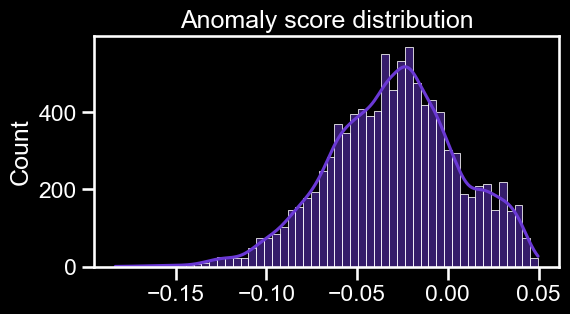

In [59]:
#| echo: false
#| output: true
#| classes: my_class1

# plot the predictions distribution
plt.figure(figsize=(6,3))
sns.histplot(preds, color='#6A38D4', kde=True).set_title("Anomaly score distribution")
plt.show()

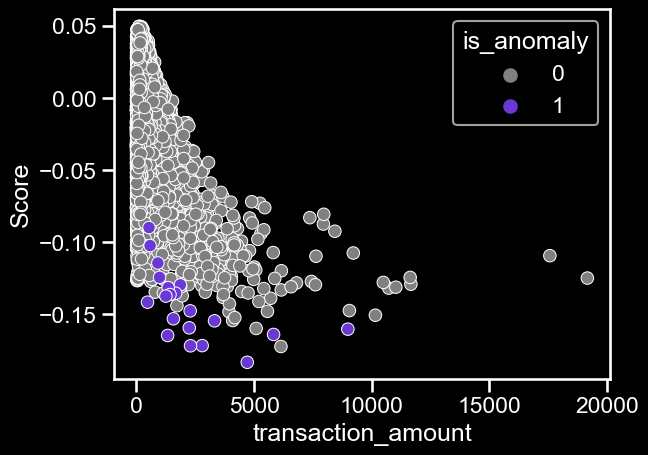

In [65]:
#| echo: false
#| output: false

fig = sns.scatterplot(y=preds, x='transaction_amount', hue='is_anomaly', palette=['gray', '#6A38D4'], data=df)
plt.ylabel("Score")
plt.show()

##
#### 3. Treinando o isolation forest: verificando o resultado

:::: {.columns}

::: {.column width="50%"}
* 📈 Ao lado temos o plot do score de anomalia versus o valor da transação.
* ➗ É possível observar que o modelo consegue separar razoavelmente as anomalias (fraudes).
* ➗ Entre -0.10 e -0.15, o modelo já encontra algumas fraudes, mas ainda pode errar bastante (falsos positivos)
* ➗ Porém, abaixo do score -0.15, o modelo consegue identificar bem os casos anômalos
:::

::: {.column width="50%"}
<img src="model_result.png" size='65%'></img>
:::

::::

##
#### 4. Um sistema antifraude usando o isolation forest

:::: {.columns}

::: {.column width="50%"}
* ⚠️ Podemos usar o range de -0.10 até -0.15 para gerar alertas de fraude.
* ❌ Podemos usar o range de -0.15 até -1 para bloquear transações.
* 🔢 Usando -0.15 como ponto de corte para bloqueio, o modelo teria **45% de recall**
* 🤌 Ou seja, ele conseguiria bloquear 45% das transações fraudulentas
* 🌲 Ao utilizar o isolation forest é possível criar um sistema antifraude robusto e eficaz.
:::

::: {.column width="50%"}
<img src="model_result_decision.png" size='65%'></img>
:::

::::

##
#### 4. Um sistema antifraude usando o isolation forest

:::: {.columns}

::: {.column width="30%"}
* Segue um diagram ilustrando a apliação do modelo treinado em um sistema antifraude
:::

::: {.column width="10%"}
:::

::: {.column width="60%"}
<img src="fraud_system_diagram.png" size='100%'></img>
:::

::::

##
#### 5. Vantagens e Desvatagens do isolation forest

:::: {.columns}
::: {.column width="50%"}
👍 Vantagens

* Consegue lidar com alta dimensionalidade (alto número de features)
* Não exige conhecimento prévio da distribuição dos dados.
* Reduz o overfitting por usar multiplas árvores de decisão
* Escalável, algoritmo rápido, com complexidade linear
* Não precisa de um label
:::

::: {.column width="50%"}
👎 Desvatagens

* Pode ter problemas com dados muito esparsos ou discrepantes
* Dificuldade em lidar com categóricos de alta cardinalidade (muitas categorias)
* Interpretabilidade limitada: Isolation Forest é um algoritmo de black-box
* Necessidade de especificar alguns hiperparâmetros
:::

::::


##
### Achou esse conteúdo útil?

:::: {.columns}

::: {.column width="60%"}
Me ajude dando o seu like, comentando ou compartilhando essa publicação. Sua opinião é importante para mim!
❤️👍
:::
:::

<img src="logo.png" src="#" height="50%"></img><br>